##**Connection avec le Drive**##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**extraction des images**##

In [ ]:
!unzip /content/drive/MyDrive/GHIM-20库.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
         continuing with "central" filename version
  inflating: GHIM-20库/6_3335.jpg   
GHIM-20库/6_3336.jpg:  mismatching "local" filename (GHIM-20х║У/6_3336.jpg),
         continuing with "central" filename version
  inflating: GHIM-20库/6_3336.jpg   
GHIM-20库/6_3337.jpg:  mismatching "local" filename (GHIM-20х║У/6_3337.jpg),
         continuing with "central" filename version
  inflating: GHIM-20库/6_3337.jpg   
GHIM-20库/6_3338.jpg:  mismatching "local" filename (GHIM-20х║У/6_3338.jpg),
         continuing with "central" filename version
  inflating: GHIM-20库/6_3338.jpg   
GHIM-20库/6_3339.jpg:  mismatching "local" filename (GHIM-20х║У/6_3339.jpg),
         continuing with "central" filename version
  inflating: GHIM-20库/6_3339.jpg   
GHIM-20库/6_3340.jpg:  mismatching "local" filename (GHIM-20х║У/6_3340.jpg),
         continuing with "central" filename version
  inflating: GHIM-20库/6_3340.jpg   
GHIM-20库/6_334

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Activation, Dense
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications import vgg16
from keras.applications import vgg19
from keras.applications import resnet50
from keras.applications import inception_v3
from keras.applications import mobilenet
from keras.applications import xception
from keras.layers.pooling import GlobalAveragePooling2D
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import operator
import math
import os
import tensorflow as tf
from keras.models import Model
from sklearn.neighbors import NearestNeighbors

In [ ]:
import os
import math 
import tensorflow
import numpy as np 
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from keras.applications.xception import preprocess_input
from tensorflow.python.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
from keras.utils import *
from keras.models import load_model
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
def euclidianDistance(l1,l2):
    distance = 0
    length = min(len(l1),len(l2))
    for i in range(length):
        distance += pow((l1[i] - l2[i]), 2)
    return math.sqrt(distance)

In [ ]:
def chi2_distance(histA, histB, eps = 1e-10):
    #calculating the chi squared distance
    d = 0.5 * np.sum([((a-b) ** 2) / (a + b + eps) for (a, b) in zip(histA, histB)])
    
    #return the chi squared distance
    return d

In [ ]:
#model1 = vgg16.VGG16(weights='/content/Modelvgg16.h5', include_top=True,pooling='avg')
# model2 = Model(inputs=model1.input, outputs=model1.layers[-4].output)

##**Construction du model VGG16**##

In [ ]:
base_model1 = vgg16.VGG16(weights= 'imagenet', include_top=False, input_shape=(299,299,3))
base_model2 = Model(inputs=base_model1.input, outputs=base_model1.layers[-4].output)
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense (20, activation = 'softmax')(x)
vgg = Model(inputs=base_model2.inputs, outputs = predictions)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.compile(
    loss='binary_crossentropy',
    optimizer= Adam(lr=0.001),
    metrics=['accuracy']
)

##**Entrainement du model**##

In [ ]:
def generate_from_paths_and_labels(input_paths, labels, batch_size, input_size=(299, 299)):
  num_samples = len(input_paths)
  while 1:
     perm = np.random.permutation(num_samples) 
     input_paths = input_paths[perm]
     labels = labels[perm]
     for i in range(0, num_samples, batch_size):
       inputs = list(map(
           lambda x: image.load_img(x, target_size=input_size),
           input_paths[i:i+batch_size]
       ))
       inputs = np.array(list(map(
            lambda x: image.img_to_array(x),
       inputs
       )))
       inputs = preprocess_input(inputs)
       yield (inputs, labels[i:i+batch_size])



In [ ]:
input_paths = []
labels = []

dbDirectory = "GHIM-20库"

for file_path in os.listdir(dbDirectory):
    
    # Récupérer le label de chaque image
    #******************************************
    check = True
    lab = ""
    for letter in file_path:
        
        if letter == "_":
            check = False
            
        if check:
            lab += letter
    #******************************************
    
    file_path = os.path.join(dbDirectory, file_path)
    
    if imghdr.what(file_path) == None:
        # this is not an image file
        continue    
    input_paths.append(file_path)
    labels.append(int(lab))                 #int() pour convertir string en int

In [ ]:
# Vérification avec un exemple d'image/label
print(input_paths[6666])
print(labels[6666])
print('\n Nb of inputs : ', len(input_paths))
print('\n Nb of labels : ', len(labels))

GHIM-20库/14_7138.jpg
14

 Nb of inputs :  10000

 Nb of labels :  10000


In [ ]:
nb_classes = max(labels) + 1

print("Nombre de classes : ", nb_classes)

# Convertion des labels vers le format one-hot-vector
labels = to_categorical(labels, nb_classes)

input_paths = np.array(input_paths)

# On mélange les données
perm = np.random.permutation(len(input_paths))
labels = labels[perm]
input_paths = input_paths[perm]


#  On divise les données en deux paquets : entrainement et validation
border = int(len(input_paths) * 0.85)

train_labels, val_labels = labels[:border], labels[border:]
train_input_paths, val_input_paths = input_paths[:border], input_paths[border:]
print("Training on %d images and labels" % (len(train_input_paths)))
print("Validation on %d images and labels" % (len(val_input_paths)))

Nombre de classes :  20
Training on 8500 images and labels
Validation on 1500 images and labels


In [ ]:
nbr_batch_size=64
nb_ephoch = 30
result_path="content"
len_train=len(train_input_paths)
len_val=len(val_input_paths)
# # CrÃ©ation du dossier pour sauvegarder le modÃ¨le
# if os.path.exists(result_path) == False:
#     os.makedirs(result_path)

checkpointer = ModelCheckpoint('modelvgg16.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=2, verbose=1)

modelvgg16=vgg.fit_generator(
    generator=generate_from_paths_and_labels(
        input_paths=train_input_paths,
        labels=train_labels,
        batch_size=nbr_batch_size
    ),
    steps_per_epoch=math.ceil(len_train / nbr_batch_size),
    epochs=nb_ephoch,
    validation_data=generate_from_paths_and_labels(
        input_paths=val_input_paths,
        labels = val_labels,
        batch_size=nbr_batch_size
    ),
    validation_steps=math.ceil(len_val / nbr_batch_size),
    callbacks = [earlystopper, checkpointer])




In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

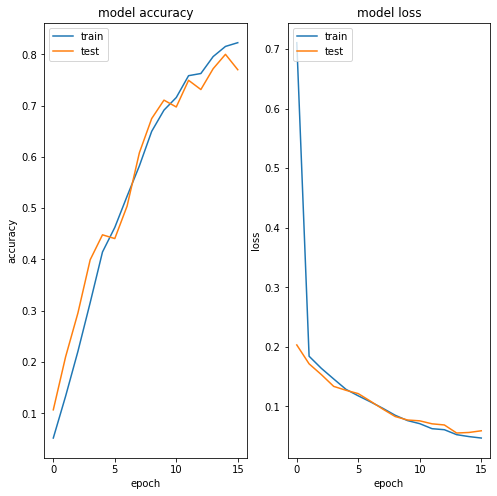

In [ ]:
plot_learning_curve(modelvgg16)

##**Extraction des caractéristiques et stockage dans un fichier csv**##

In [ ]:
# files = "GHIM-20库"
# modelvgg = load_model('modelvgg16.h5')

In [ ]:
pas =0

output = open("VGG16index.csv","w")
for j in os.listdir(files) :
    data = os.path.join(files, j)
    # print (data)
    if not data.endswith(".jpg"):
        continue
    file_name = os.path.basename(data)
    # load an image from file
    image = load_img(data, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image) #fonction importer
    # predict the probability across all output classes
    feature = modelvgg.predict(image)
    feature = np.array(feature[0])  
    # np.savetxt(folder_modelvgg16+"/"+os.path.splitext(file_name)[0]+".txt",feature)
    # features1.append((data,feature))
    feature = [str(f) for f in feature]
    output.write("%s,%s\n" % (file_name, ",".join(feature)))
# closing the index file
output.close()

# **Résultat de l'indexation (10000 descripteurs) dans Features/VGG16**



In [ ]:

def search(queryFeatures,direction,mesuredistance,sortie ):
  #fonction qui permet de trouver les images les plus semblables à une image d'entrer
  #Inpout : queryFeatures: features de l'image d'entrer; mesuredistance : permet de choisir comment les distances seront calculer
  #sortie : nombre de voisins à la sortie
  #Output : une matrice de la taille de Sortie, comprenant les features et le nom des plus proches voisins 
    #make a dictionary for thr results
    results = {}
    
    #open the index file for reading
    with open(direction) as f:
        # initializing the csv reader
        reader = csv.reader(f)

        if mesuredistance == 1:
          print('dans 1')
        
          #loop over the rows in the index
          for row in reader:
            

            # parse out the imageID and features, then calculate the chi-squared distance between the saved features and the features of our image
            features = [float(x) for x in row[1:]]  
            d = euclidianDistance(features, queryFeatures)
            # now we have the distance between the two feature vectors. we now update the results dictionary
            results[row[0]] = d

        if mesuredistance == 2:
          print('dans 2')
          #loop over the rows in the index
          for row in reader:
            

            # parse out the imageID and features, then calculate the chi-squared distance between the saved features and the features of our image
            features = [float(x) for x in row[1:]]  
            d = chi2_distance(features, queryFeatures)
            # now we have the distance between the two feature vectors. we now update the results dictionary
            results[row[0]] = d
            
        # closing the reader
        f.close()
        
    # sort the results such that the dictionary starts with smaller values as they will be closest to the given image
    results = sorted([(v,k) for (k,v) in results.items()])
    
    #return our results
    return results[:sortie]

In [ ]:
def image_entree(target, model,shape):
  #fonction qui extrait les caractéristiques de l'image d'entrée
  queryFeatures = os.path.join(files, target)
  print (queryFeatures)
  image = load_img(queryFeatures, target_size=shape)
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image) #fonction importer
  # predict the probability across all output classes
  feature = model.predict(image)
  feature = np.array(feature[0])
  return feature,queryFeatures
 
      

In [ ]:
target = '7_3501.jpg'
feature,queryFeatures = image_entree(target,modelvgg,(299, 299))

NameError: ignored

In [ ]:
import warnings
import csv
direction = "/content/VGG16index.csv"
warnings.filterwarnings('ignore')
sortie=20
voisins2 = search(feature,direction,1,sortie)

nom_image_plus_proches = []
nom_image_plus_proches_sans = []

for k in range(sortie):
  nom_image_plus_proches.append(voisins2[k])
plt.figure(figsize=(5, 5))
plt.imshow(imread(queryFeatures), cmap='gray', interpolation='none')
plt.title("Image requête")
Tempon=os.path.splitext(os.path.basename(target))[0]

nom_image_requete = int((Tempon.split('_'))[0])
print(nom_image_requete)


plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

for j in range(sortie):
  plt.subplot(sortie/4,sortie/5,j+1)
  plt.imshow(imread(files +'/'+ nom_image_plus_proches[j][1]), cmap='gray',interpolation='none')
  tempon2 =os.path.splitext(os.path.basename(nom_image_plus_proches[j][1]))[0]
  nom_image_plus_proches_sans.append(int((tempon2.split('_'))[0]))
  title = "Image proche n°"+str(j)+ ":" + nom_image_plus_proches[j][1]
  plt.title(title)

NameError: ignored

In [ ]:
text_file = open("VGG16_RP.txt", "w")
rappel_precision=[]
rp = [] 

for j in range(sortie):
  position2=nom_image_plus_proches_sans[j]
  if nom_image_requete==position2: 
    rappel_precision.append("pertinant") 
  else:
    rappel_precision.append("non pertinant")
for i in range(sortie):
  j=i
  val=0 
  while j>=0:
    if rappel_precision[j]=="pertinant":
       val+=1
    j-=1
  rp.append(str((val/(i+1))*100)+" "+str((val/sortie)*100)) 
with open("VGG16_RP.txt", 'w') as s:
  for a in rp: 
    s.write(str(a) + '\n')
print ((val/sortie)*100)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

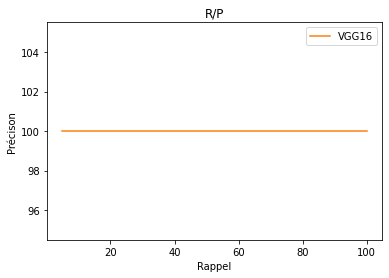

In [ ]:
import csv
x = []
y = []
fichier = "VGG16_RP.txt"
with open(fichier) as csvfile:
  plots = csv.reader(csvfile, delimiter=' ')
  for row in plots:
    x.append(float(row[0]))
    y.append(float(row[1]))
    fig = plt.figure()
line, = plt.plot(y,x,'C1', label="VGG16" )
plt.xlabel('Rappel') 
plt.ylabel('Précison')
plt.title("R/P") 
plt.legend()

##**Utilisons le model InceptionV3**##





In [ ]:
num_classes=20
base_model1=inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
base_model2 = Model(inputs=base_model1.input, outputs=base_model1.layers[-4].output)
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense (20, activation = 'softmax')(x)
modelv3 = Model(inputs=base_model2.inputs, outputs=predictions)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
modelv3.summary()

NameError: ignored

In [ ]:
modelv3.compile(
    loss='binary_crossentropy',
    optimizer= Adam(lr=0.001),
    metrics=['accuracy']
)

##**Entrainement du model**##

In [ ]:
input_paths = []
labels = []

dbDirectory = "GHIM-20库"

for file_path in os.listdir(dbDirectory):
    
    # Récupérer le label de chaque image
    #******************************************
    check = True
    lab = ""
    for letter in file_path:
        
        if letter == "_":
            check = False
            
        if check:
            lab += letter
    #******************************************
    
    file_path = os.path.join(dbDirectory, file_path)
    
    if imghdr.what(file_path) == None:
        # this is not an image file
        continue    
    input_paths.append(file_path)
    labels.append(int(lab))                 #int() pour convertir string en int

In [ ]:
nb_classes = max(labels) + 1

print("Nombre de classes : ", nb_classes)

# Convertion des labels vers le format one-hot-vector
labels = to_categorical(labels, nb_classes)

input_paths = np.array(input_paths)

# On mélange les données
perm = np.random.permutation(len(input_paths))
labels = labels[perm]
input_paths = input_paths[perm]


#  On divise les données en deux paquets : entrainement et validation
border = int(len(input_paths) * 0.85)

train_labels, val_labels = labels[:border], labels[border:]
train_input_paths, val_input_paths = input_paths[:border], input_paths[border:]
print("Training on %d images and labels" % (len(train_input_paths)))
print("Validation on %d images and labels" % (len(val_input_paths)))

Nombre de classes :  20
Training on 8500 images and labels
Validation on 1500 images and labels


In [ ]:
nbr_batch_size=64
nb_ephoch = 30
result_path="content"
len_train=len(train_input_paths)
len_val=len(val_input_paths)
# # CrÃ©ation du dossier pour sauvegarder le modÃ¨le
# if os.path.exists(result_path) == False:
#     os.makedirs(result_path)

checkpointer = ModelCheckpoint('modelInceptionv3.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

modelInceptionv3=modelv3.fit_generator(
    generator=generate_from_paths_and_labels(
        input_paths=train_input_paths,
        labels=train_labels,
        batch_size=nbr_batch_size
    ),
    steps_per_epoch=math.ceil(len_train / nbr_batch_size),
    epochs=nb_ephoch,
    validation_data=generate_from_paths_and_labels(
        input_paths=val_input_paths,
        labels = val_labels,
        batch_size=nbr_batch_size
    ),
    validation_steps=math.ceil(len_val / nbr_batch_size),
    callbacks = [earlystopper, checkpointer])




Epoch 1/30
133/133 [==============================] - 136s 906ms/step - loss: 0.1041 - accuracy: 0.7321 - val_loss: 0.3215 - val_accuracy: 0.2687

Epoch 00001: val_loss improved from inf to 0.32147, saving model to modelInceptionv3.h5
Epoch 2/30
133/133 [==============================] - 122s 917ms/step - loss: 0.0264 - accuracy: 0.9139 - val_loss: 0.3493 - val_accuracy: 0.5660

Epoch 00002: val_loss did not improve from 0.32147
Epoch 3/30
133/133 [==============================] - 122s 914ms/step - loss: 0.0180 - accuracy: 0.9406 - val_loss: 0.4891 - val_accuracy: 0.4673

Epoch 00003: val_loss did not improve from 0.32147
Epoch 4/30
133/133 [==============================] - 122s 915ms/step - loss: 0.0181 - accuracy: 0.9429 - val_loss: 0.1141 - val_accuracy: 0.7613

Epoch 00004: val_loss improved from 0.32147 to 0.11407, saving model to modelInceptionv3.h5
Epoch 5/30
133/133 [==============================] - 122s 914ms/step - loss: 0.0130 - accuracy: 0.9579 - val_loss: 0.1769 - val_a

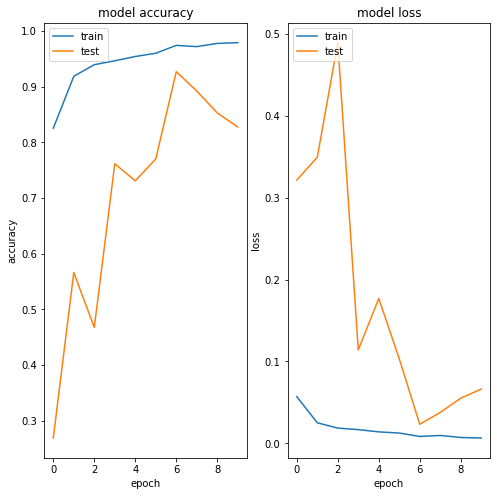

In [ ]:
plot_learning_curve(modelInceptionv3)

In [ ]:
from sklearn.metrics import confusion_matrix
y=modelv3.predict(val_input_paths, verbose=2)
pred = np.round(y).astype(int)
confusion_matrix(val_labels, pred)

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(Y_val, pred),cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['avis négatif','avis positif'] , yticklabels = ['avis négatif','avis positif'])
plt.xlabel("Predicted")
plt.ylabel("Verité")

In [ ]:
modelv3 = load_model('modelInceptionv3.h5')

In [ ]:
files = "GHIM-20库" #chemin vers la base d'images


In [ ]:
# pas =0

output = open("inception_v3.csv","w")
for j in os.listdir(files) :
    data = os.path.join(files, j)
    # print (data)
    if not data.endswith(".jpg"):
        continue
    file_name = os.path.basename(data)
    # load an image from file
    image = load_img(data, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image) #fonction importer
    # predict the probability across all output classes
    feature = modelv3.predict(image)
    feature = np.array(feature[0])  
    # np.savetxt(folder_modelvgg16+"/"+os.path.splitext(file_name)[0]+".txt",feature)
    # features1.append((data,feature))
    feature = [str(f) for f in feature]
    output.write("%s,%s\n" % (file_name, ",".join(feature)))
# closing the index file
output.close()


In [ ]:
target = '7_3501.jpg'
feature2,queryFeatures = image_entree(target,modelv3,(299, 299))
 

GHIM-20库/7_3501.jpg


In [ ]:
feature2

array([9.9925154e-01, 1.7101422e-05, 1.3899698e-05, 3.5134926e-06,
       9.5896530e-06, 2.0824131e-05, 8.9241694e-06, 1.2342527e-05,
       2.1072742e-06, 2.0753313e-07, 1.4190500e-06, 3.7229071e-05,
       1.7689964e-04, 8.0238633e-06, 4.3844819e-05, 8.0551908e-06,
       4.0429604e-06, 3.4100804e-06, 6.1744981e-06, 3.7078574e-04],
      dtype=float32)

dans 1
7


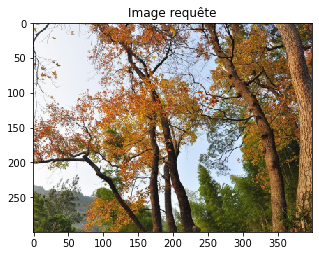

<Figure size 1800x1800 with 0 Axes>

In [ ]:
import warnings
import csv
direction = "/content/inception_v3.csv"
warnings.filterwarnings('ignore')
sortie = 500
voisins2 = search(feature2,direction,1,sortie)

nom_image_plus_proches = []
nom_image_plus_proches_sans = []

for k in range(sortie):
  nom_image_plus_proches.append(voisins2[k])
plt.figure(figsize=(5, 5))
plt.imshow(imread(queryFeatures), cmap='gray', interpolation='none')
plt.title("Image requête")
Tempon=os.path.splitext(os.path.basename(target))[0]

nom_image_requete = int((Tempon.split('_'))[0])
print(nom_image_requete)


plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

for j in range(sortie):
  # plt.subplot(sortie/5,sortie/10,j+1)
  # plt.imshow(imread(files +'/'+ nom_image_plus_proches[j][1]), cmap='gray',interpolation='none')
  tempon2 =os.path.splitext(os.path.basename(nom_image_plus_proches[j][1]))[0]
  nom_image_plus_proches_sans.append(int((tempon2.split('_'))[0]))
  # title = "Image proche n°"+str(j)+ ":" + nom_image_plus_proches[j][1]
  # plt.title(title)

In [ ]:
text_file = open("inceptionv3_RP.txt", "w")
rappel_precision=[]
rp = [] 

for j in range(sortie):
  position2=nom_image_plus_proches_sans[j]
  if nom_image_requete==position2: 
    rappel_precision.append("pertinant") 
  else:
    rappel_precision.append("non pertinant")
for i in range(sortie):
  j=i
  val=0 
  while j>=0:
    if rappel_precision[j]=="pertinant":
       val+=1
    j-=1
  rp.append(str((val/(i+1))*100)+" "+str((val/sortie)*100)) 
with open("inceptionv3_RP.txt", 'w') as s:
  for a in rp: 
    s.write(str(a) + '\n')
print ((val/sortie)*100)

98.4


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

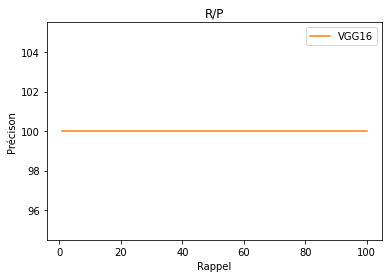

In [ ]:
import csv
x = []
y = []
fichier = "inceptionv3_RP.txt"
with open(fichier) as csvfile:
  plots = csv.reader(csvfile, delimiter=' ')
  for row in plots:
    x.append(float(row[0]))
    y.append(float(row[1]))
    fig = plt.figure()
line, = plt.plot(y,x,'C1', label="VGG16" )
plt.xlabel('Rappel') 
plt.ylabel('Précison')
plt.title("R/P") 
plt.legend()

##**Utilisons le model resNET50**##

In [ ]:
from keras.applications.resnet50 import ResNet50 # input shape= 224x224
num_classes=20
base_model1=resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model2 = Model(inputs=base_model1.input, outputs=base_model1.layers[-4].output)
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense (20, activation = 'softmax')(x)
modelresnet = Model(inputs=base_model2.inputs, outputs=predictions)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
modelresnet.summary()

In [ ]:
modelresnet.compile(
    loss='binary_crossentropy',
    optimizer= Adam(lr=0.001),
    metrics=['accuracy']
)

In [ ]:
input_paths = []
labels = []

dbDirectory = "GHIM-20库"

for file_path in os.listdir(dbDirectory):
    
    # Récupérer le label de chaque image
    #******************************************
    check = True
    lab = ""
    for letter in file_path:
        
        if letter == "_":
            check = False
            
        if check:
            lab += letter
    #******************************************
    
    file_path = os.path.join(dbDirectory, file_path)
    
    if imghdr.what(file_path) == None:
        # this is not an image file
        continue    
    input_paths.append(file_path)
    labels.append(int(lab))                 #int() pour convertir string en int

In [ ]:
nb_classes = max(labels) + 1

print("Nombre de classes : ", nb_classes)

# Convertion des labels vers le format one-hot-vector
labels = to_categorical(labels, nb_classes)

input_paths = np.array(input_paths)

# On mélange les données
perm = np.random.permutation(len(input_paths))
labels = labels[perm]
input_paths = input_paths[perm]


#  On divise les données en deux paquets : entrainement et validation
border = int(len(input_paths) * 0.85)

train_labels, val_labels = labels[:border], labels[border:]
train_input_paths, val_input_paths = input_paths[:border], input_paths[border:]
print("Training on %d images and labels" % (len(train_input_paths)))
print("Validation on %d images and labels" % (len(val_input_paths)))

Nombre de classes :  20
Training on 8500 images and labels
Validation on 1500 images and labels


In [ ]:
nbr_batch_size=64
nb_ephoch = 30
result_path="content"
len_train=len(train_input_paths)
len_val=len(val_input_paths)
# # CrÃ©ation du dossier pour sauvegarder le modÃ¨le
# if os.path.exists(result_path) == False:
#     os.makedirs(result_path)

checkpointer = ModelCheckpoint('modelresnet50.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=3, verbose=1)

modelresnet50=modelresnet.fit_generator(
    generator=generate_from_paths_and_labels(
        input_paths=train_input_paths,
        labels=train_labels,
        batch_size=nbr_batch_size
    ),
    steps_per_epoch=math.ceil(len_train / nbr_batch_size),
    epochs=nb_ephoch,
    validation_data=generate_from_paths_and_labels(
        input_paths=val_input_paths,
        labels = val_labels,
        batch_size=nbr_batch_size
    ),
    validation_steps=math.ceil(len_val / nbr_batch_size),
    callbacks = [earlystopper, checkpointer])




Epoch 1/30
133/133 [==============================] - 186s 1s/step - loss: 0.1626 - accuracy: 0.4122 - val_loss: 10.8470 - val_accuracy: 0.0493

Epoch 00001: val_loss improved from inf to 10.84702, saving model to modelresnet50.h5
Epoch 2/30
133/133 [==============================] - 170s 1s/step - loss: 0.0479 - accuracy: 0.8146 - val_loss: 0.4905 - val_accuracy: 0.0493

Epoch 00002: val_loss improved from 10.84702 to 0.49053, saving model to modelresnet50.h5
Epoch 3/30
133/133 [==============================] - 170s 1s/step - loss: 0.0354 - accuracy: 0.8710 - val_loss: 0.5359 - val_accuracy: 0.0660

Epoch 00003: val_loss did not improve from 0.49053
Epoch 4/30
133/133 [==============================] - 170s 1s/step - loss: 0.0261 - accuracy: 0.9126 - val_loss: 0.4883 - val_accuracy: 0.0607

Epoch 00004: val_loss improved from 0.49053 to 0.48825, saving model to modelresnet50.h5
Epoch 5/30
133/133 [==============================] - 170s 1s/step - loss: 0.0214 - accuracy: 0.9235 - val_

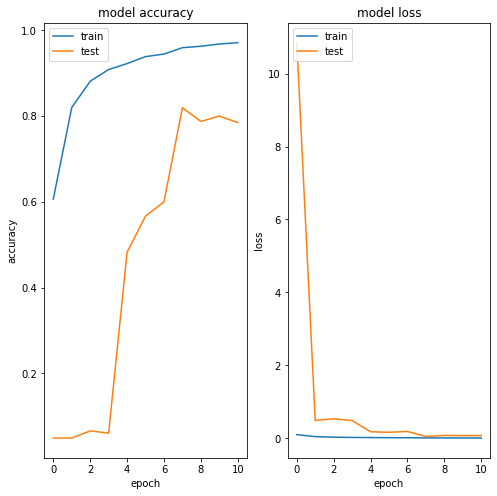

In [ ]:
plot_learning_curve(modelresnet50)

In [ ]:
files = "GHIM-20库" #chemin vers la base d'images

In [ ]:
# pas =0

output = open("modelresnet50.csv","w")
for j in os.listdir(files) :
    data = os.path.join(files, j)
    # print (data)
    if not data.endswith(".jpg"):
        continue
    file_name = os.path.basename(data)
    # load an image from file
    image = load_img(data, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the  model
    image = preprocess_input(image) #fonction importer
    # predict the probability across all output classes
    feature = modelresnet.predict(image)
    feature = np.array(feature[0])  
    # np.savetxt(folder_modelvgg16+"/"+os.path.splitext(file_name)[0]+".txt",feature)
    # features1.append((data,feature))
    feature = [str(f) for f in feature]
    output.write("%s,%s\n" % (file_name, ",".join(feature)))
# closing the index file
output.close()


In [ ]:
target = '5_2810.jpg'
feature2,queryFeatures = image_entree(target,modelresnet,(224, 224))
 

GHIM-20库/5_2810.jpg


dans 1
5_2810


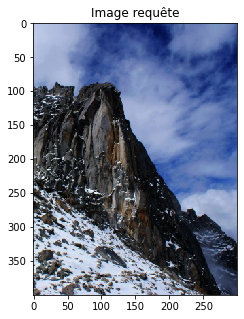

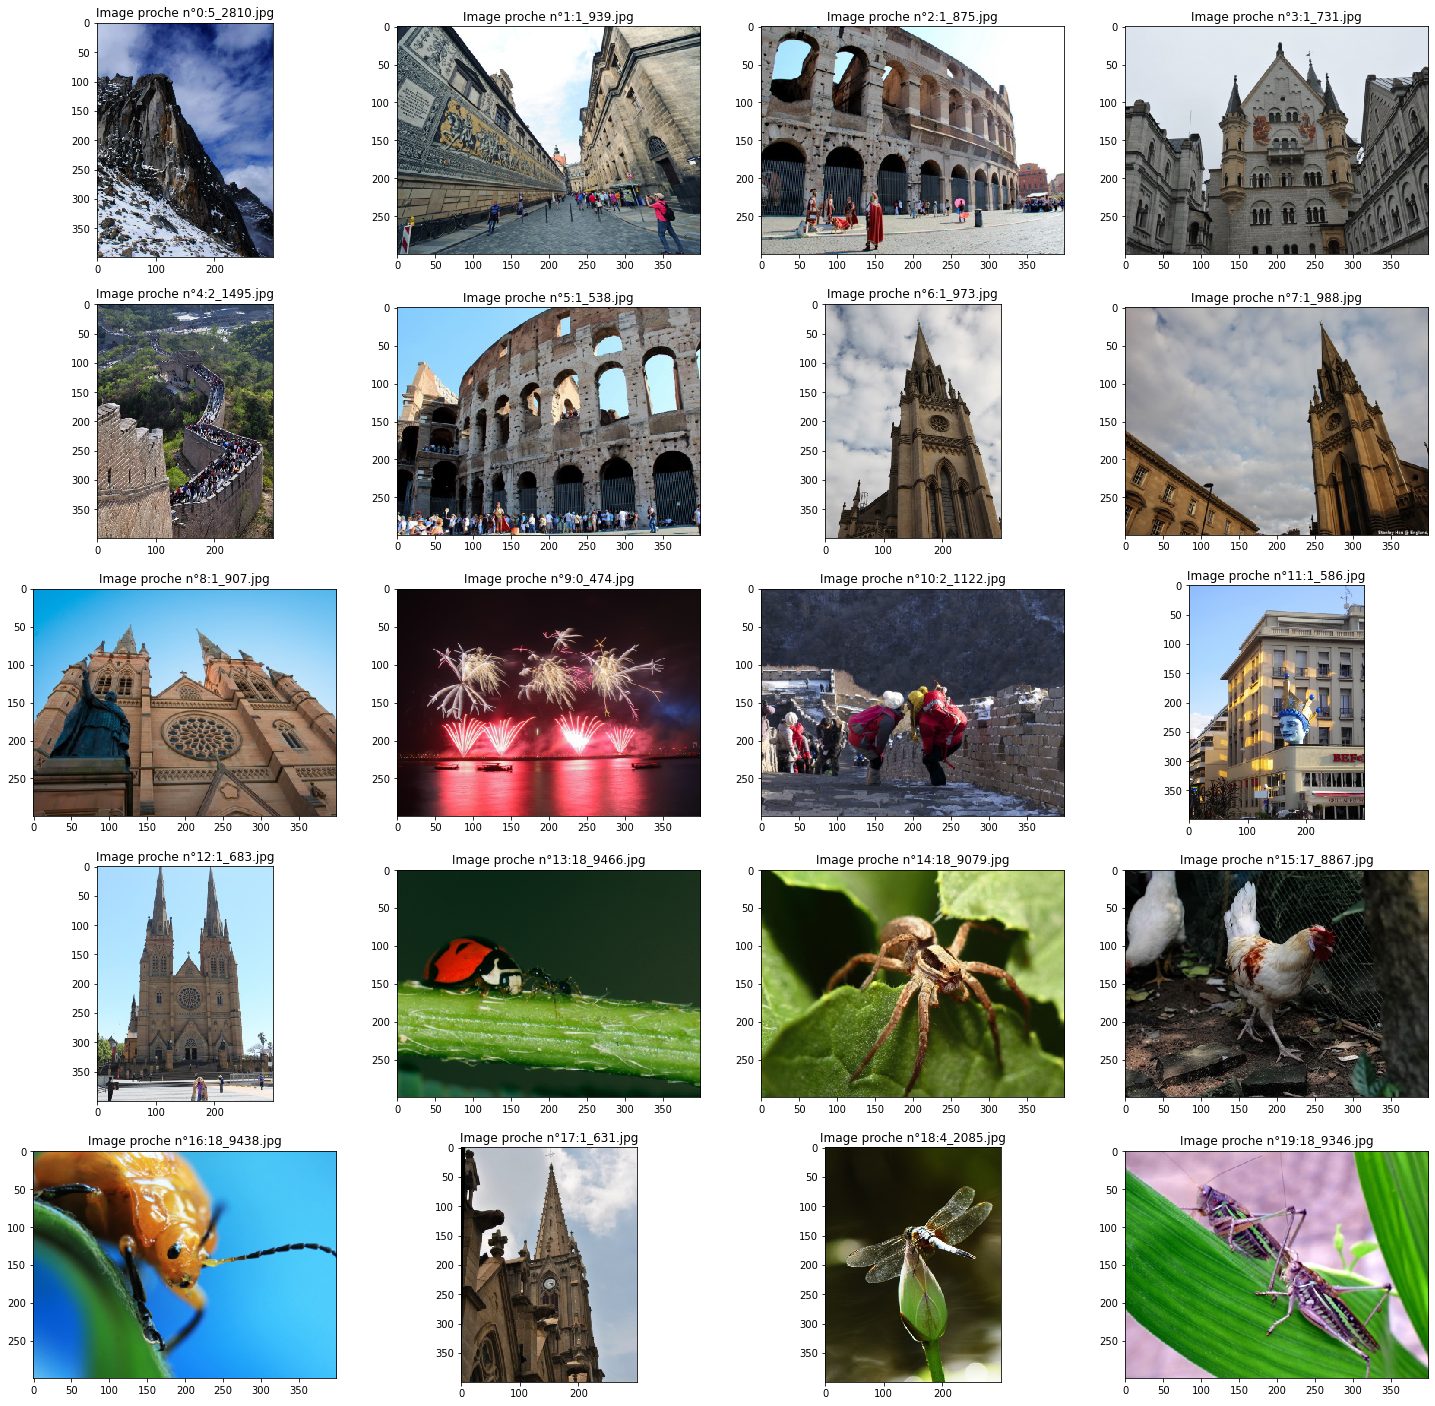

In [ ]:
import warnings
import csv
direction = "/content/modelresnet50.csv"
warnings.filterwarnings('ignore')
sortie=20
voisins2 = search(feature2,direction,1,sortie)

nom_image_plus_proches = []
nom_image_plus_proches_sans = []

for k in range(sortie):
  nom_image_plus_proches.append(voisins2[k])
plt.figure(figsize=(5, 5))
plt.imshow(imread(queryFeatures), cmap='gray', interpolation='none')
plt.title("Image requête")
nom_image_requete=os.path.splitext(os.path.basename(target))[0]
print(nom_image_requete)


plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

for j in range(sortie):
  plt.subplot(sortie/4,sortie/5,j+1)
  plt.imshow(imread(files +'/'+ nom_image_plus_proches[j][1]), cmap='gray',interpolation='none')
  nom_image_plus_proches_sans.append(os.path.splitext(os.path.basename(nom_image_plus_proches[j][1]))[0])
  title = "Image proche n°"+str(j)+ ":" + nom_image_plus_proches[j][1]
  plt.title(title)

In [ ]:
text_file = open("modelresnet50_RP.txt", "w")
rappel_precision=[]
rp = [] 
position1=int(nom_image_requete) //500

for j in range(sortie):
  position2=int(nom_image_plus_proches_sans[j]) //500
  if position1==position2: 
    rappel_precision.append("pertinant") 
  else:
    rappel_precision.append("non pertinant")
for i in range(sortie):
  j=i
  val=0 
  while j>=0:
    if rappel_precision[j]=="pertinant":
       val+=1
    j-=1
  rp.append(str((val/(i+1))*100)+" "+str((val/sortie)*100)) 
with open("modelresnet50_RP.txt", 'w') as s:
  for a in rp: 
    s.write(str(a) + '\n')
print ((val/sortie)*100)

20.0


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

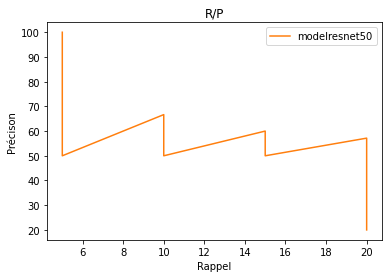

In [ ]:
import csv
x = []
y = []
fichier = "modelresnet50_RP.txt"
with open(fichier) as csvfile:
  plots = csv.reader(csvfile, delimiter=' ')
  for row in plots:
    x.append(float(row[0]))
    y.append(float(row[1]))
    fig = plt.figure()
line, = plt.plot(y,x,'C1', label="modelresnet50" )
plt.xlabel('Rappel') 
plt.ylabel('Précison')
plt.title("R/P") 
plt.legend()